<a href="https://colab.research.google.com/github/proffi1309-ctrl/ML/blob/main/Hometasks/ML_PTCourse_MicroHT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Микро-ДЗ 1: Знакомство с машинным обучением

## Описание задачи и загрузка данных

В этом задании вам нужно обучить линейную регрессию для предсказания стоимости домов в Калифорнии.

Альтернативная задача: прогноз стоимости алмазов.

Рекомендуем решать ее после выполнения этого ноутбука. Предоставим только данные, а пайплайн надо будет воспроизвести самостоятельно.

[Ссылка на данные.](https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/diamonds_good.csv)

Загружаем необходимые библиотеки.

In [99]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

Фиксируем `random_state` для воспроизводимости случайных значений.

In [100]:
RANDOM_STATE = 42

Загрузим данные и сформируем из них матрицу объект-признак `X` и вектор `y`, содержащий целевую переменную.

In [101]:
Data = fetch_california_housing(as_frame=True)

X = Data['data']
y = Data['target']

Посмотрим первые пять записей набора данных.

In [102]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Задание 1

 Сколько строк и столбцов в матрице `X`?

In [103]:
# ваш код здесь
X.shape

# строк 20640
# столбцов 8


(20640, 8)

Посмотрим на зависимость стоимости домов (целевой переменной `y`) от признака `MedInc` (`Median Income`).
Для этого можно нарисовать диаграмму рассеяния.

Text(0, 0.5, 'House Price')

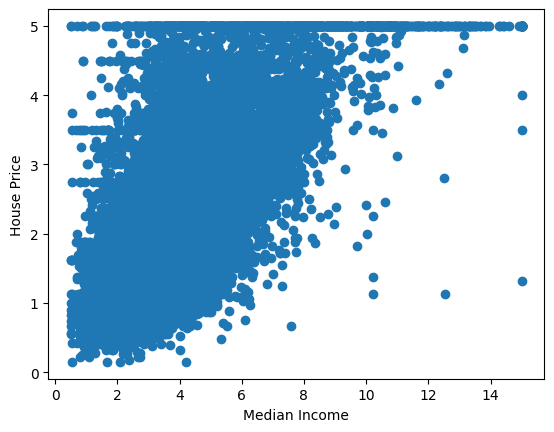

In [104]:
plt.scatter(X['MedInc'], y)
plt.xlabel('Median Income')
plt.ylabel('House Price')

По диаграмме видно, что чем больше `Median Income`, тем больше `House Price`, то есть видна прямая зависимость целевой переменной от признака `MedInc`.

## Задание 2

Постройте диаграмму рассеяния, отображающую зависимость целевой переменной от признака `Latitude`.
Какая это зависимость?

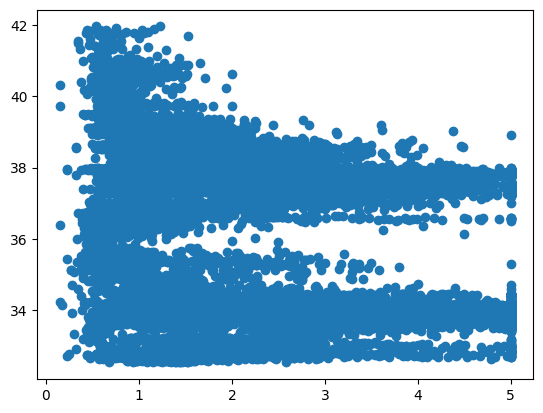

In [105]:
# ваш код здесь
plt.scatter(y,X['Latitude'])

Ещё немного поисследуем данные. Полноценный разведочный анализ в рамках этого задания, конечно, не провести, но какие-то инструменты мы потрогаем.

Давайте построим тепловую карту корреляций.

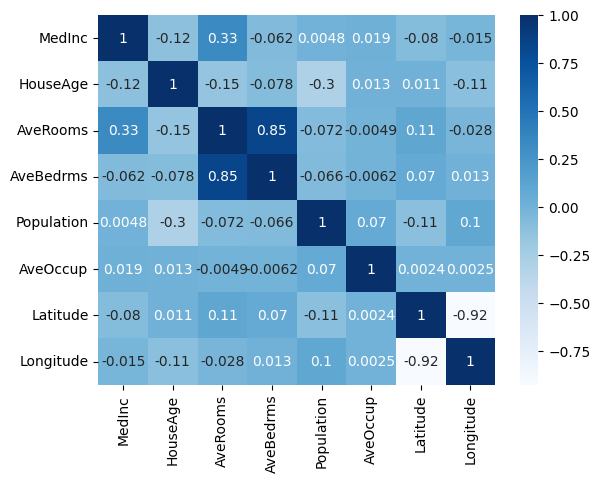

In [106]:
corr = X.corr()
sb.heatmap(corr, cmap="Blues", annot=True);

По этой матрице корреляций видно, что две наиболее зависимые пары признаков - это `AveRooms` и `AveBedrms`, а также `Latitude` и `Longitude`.

Но интереснее посмотреть, какой признак имеет наибольшую корреляцию с целевой переменной!

## Задание 3

Добавьте к матрице `X` столбец `y` и постройте матрицу корреляций.
Какой признак имеет наибольшую по модулю корреляцию с таргетом?
После выполнения задания удалите добавленный столбец `y` из матрицы `X`.

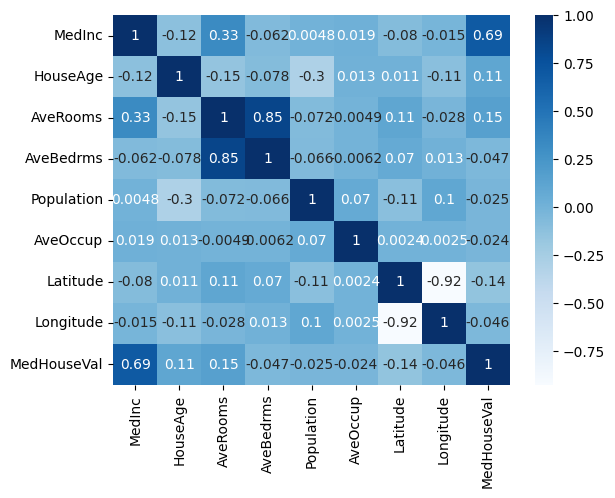

In [107]:
# ваш код здесь
X['MedHouseVal'] = y

corr = X.corr()
sb.heatmap(corr, cmap="Blues", annot=True);

# MedInc

X = X.drop(['MedHouseVal'], axis=1)


Разбейте данные на тренировочную и тестовую часть (в тест отправьте 25% данных).

In [108]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

##Задание 4

Сколько объектов попали в тест?

Обучите линейную регрессию с параметрами по умолчанию на тренировочных данных и сделайте предсказание на тестовых данных.

In [109]:
# ваш код здесь

len(Xtest) # 5160


5160

In [110]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(Xtrain, ytrain)

LinearRegression()

## Задание 5

Вычислите значение метрик *MSE* и *RMSE* на тестовых данных.
Ответ округлите до десятых.

In [111]:
from sklearn.metrics import mean_squared_error

# ваш код здесь

from sklearn.metrics import r2_score

pred = model.predict(Xtest)

RMSE = round(r2_score(ytest, pred),1)

print(RMSE)

round(mean_squared_error(ytest, pred) ** RMSE,1)

0.6


0.7